# Introduction
Hello community, welcome to this kernel. In this kernel I am going to make a language identification system using power of machine learning.

# Table of Content
1. Importance of Language Identification Systems
1. Why Naive Bayes
1. Preparing Environment
1. Data Preprocessing
1. Modeling
1. Conclusion

# Importance of Language Identification Systems

In our daily life, we use Google Translate or other translation applications generally. When we select **A** language as source and type in **B** they say *you might want to translate from B*. 

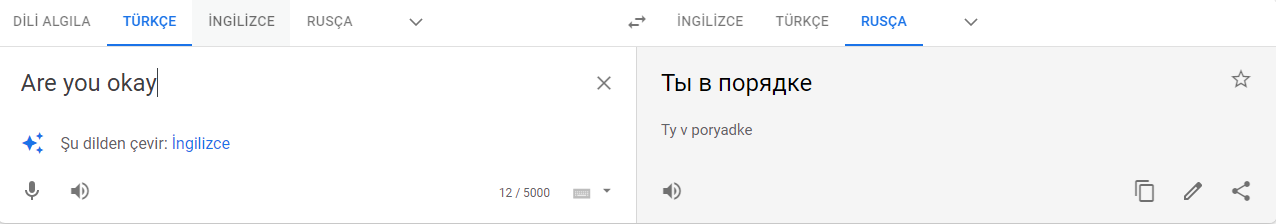

Yes, there is a language identification system behind.

There are several ways to make a language identification system. We don't have to use machine learning. Such as we can make a system that counts words and assumes that most used language is the main language.

But in this kernel we'll use the power of machine learning and statistics.

# Why Naive Bayes
In this kernel we'll use Naive Bayes algorithm. Before explaining why, let's start with **what?**

Naive Bayes is a machine learning algorithm that uses bayes theorem. You can see the formula of bayes theorem.

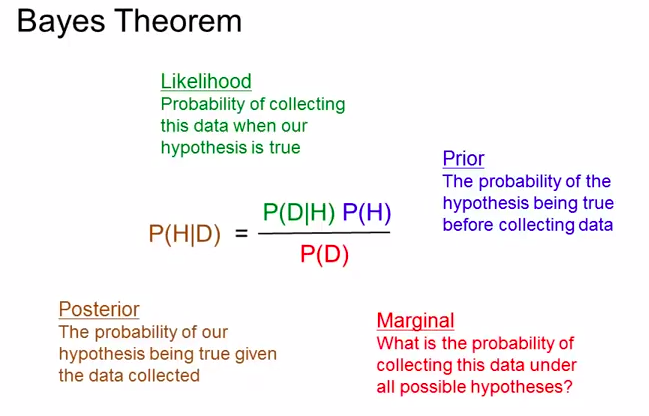

It computes probabilities for each class and selects the biggest one. 

Naive Bayes is a **fast classifier** because it does not have anything to train such as a line or neuron.

So we'll use Naive Bayes because it is fast, lightweight and powerfull.

# Preparing Environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB


import warnings as wrn
wrn.filterwarnings("ignore")

data = pd.read_csv('../input/language-identification-datasst/dataset.csv')

data.head()

# Data Preprocessing
In this section we'll prepare the data in order to use in our machine learning model. We'll follow the steps below:

* Splitting X and Y
* Encoding Y 
* Cleaning and Lowering Text
* Extracting Features using Bag of Words
* Train Test Splitting

In [ ]:
# Splitting X and Y
x,y = data["Text"],data["language"]

# Encoding Y 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(y[:10])

* We've encoded our labels, let's check how many languages we have in the dataset.

In [ ]:
print(len(np.unique(y)))

* There are 22 languages in the set, this is really good classification mission.

In [ ]:
# Cleaning and lowering text
def cleanLower(texts):
    
    # This regular expression pattern means everything except alphabetical characters
    pattern = "^[a-zA-Z]"
    cleanText = []
    for text in texts:
        # re.sub(pattern) means replace everything with a space except alphabetical characters
        cleanText.append(re.sub(pattern," ",text).lower())
        
    return cleanText

x = cleanLower(x)
x[:4]

* Now let's check how many samples we have.

In [ ]:
len(x)

* This is good, it must be 1000 samples per language. Let's check class distribution.

In [ ]:
plt.subplots(figsize=(6,4))
sns.countplot(y)
plt.xlabel("Language (Encoded)")
plt.ylabel("Number of Samples")
plt.show()


* Great, let's extract features

As you know, machines can not understand anything except numbers. So when we working with chars,we use ASCII system. 

In order to ensure machine deal with texts we use text feature extracting methods. In this kernel we'll use the most primitive one, **Bag of Words**

In bag of words method, each text will be a vector. And each feature will be a word. Let's make an example

    TEXTS           I  AM  GOOD  ARE YOU  WE LIKE MEAT
    I AM GOOD       1   1    1    0   0   0    0   0
    ARE YOU GOOD    0   0    1    1   1   0    0   0 
    WE LIKE MEAT    0   0    0    0   0   1    1   1

* Bag of Words technique is good for representing texts.

In [ ]:
vectorizer = CountVectorizer(max_features=10000)
x_end = vectorizer.fit_transform(x)


In [ ]:
x_end.shape

* If we want to fit a support vector machine, it would take hours. But naive bayes will just take 30-40 seconds.
* Let's split our set into train and test.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_end.toarray(),y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Modeling
In this section we'll fit a **Bernioulli Naive Bayes** model. Maybe you think what is **Bernoulli**? I said that Naive Bayes algorithm uses probability to predict classes. 

And there are various types of probability distributions such as *Gaussian,Bernoulli and Multinomial*. We generally use gaussian probability distribution with numerical features.

But our features are categorical and binary (yes or no, 1 or 0) And when we work with binary nomial data, best probability distribution is **Bernoulli**.



In [ ]:
start_time = time.time()


model = BernoulliNB()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)

print("Fitting Naive Bayes model took {} seconds".format(process_time))

* Let's define a function that shows accuracy and confusion matrix

In [ ]:
def evalModel(cls,test_set):
    x,y = test_set
    y_pred = cls.predict(x)
    conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y)
    acc = round(accuracy_score(y_pred=y_pred,y_true=y),2) * 100
    
    print(f"Accuracy is {acc}%")
    plt.subplots(figsize=(10,10))
    sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
evalModel(model,(x_test,y_test))

* Model confused with language 1, it predicted as language 8 35 times, let's check language 1 and language 8

In [ ]:
encoder.inverse_transform([1,8])


* Hm.

# Conclusion
Thanks for your attention, if you have any question, feel free to ask. I will certainly return to you!

Have a gret day.